# CNN Course

## In this course, you will lenrn how to use a Convolutional Neural Network to create a model that should be able to identify digits from 0 to 9 from an image. The dataset is the Mnist dataset which can be directly accessed through PyTorch.

# What is CNN(Convolutional Neural Networks)

A *Convolutional Neural Network (ConvNet/CNN)* is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

A ConvNet is able to successfully capture the Spatial and Temporal dependencies in an image through the application of relevant filters. The architecture performs a better fitting to the image dataset due to the reduction in the number of parameters involved and reusability of weights. In other words, the network can be trained to understand the sophistication of the image better.

### Convolution Layer — The Kernel
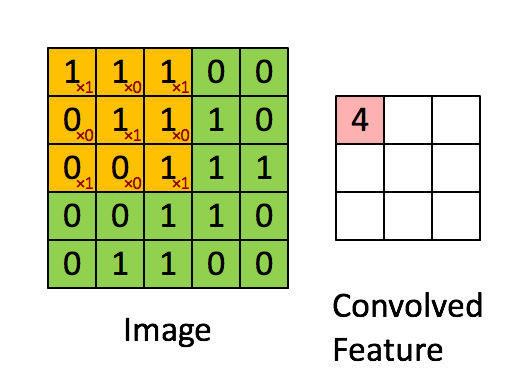

**Image Dimensions = 5 (Height) x 5 (Breadth) x 1**
In the above demonstration, the green section resembles our **5x5x1 input image**. The element involved in carrying out the convolution operation in the first part of a Convolutional Layer is called the **Kernel/Filter**, represented in the color yellow. We have selected K as a 3x3x1 matrix.

The Kernel shifts 9 times because of **Stride Length = 1**, every time performing a matrix multiplication operation between K and the portion P of the image over which the kernel is hovering.

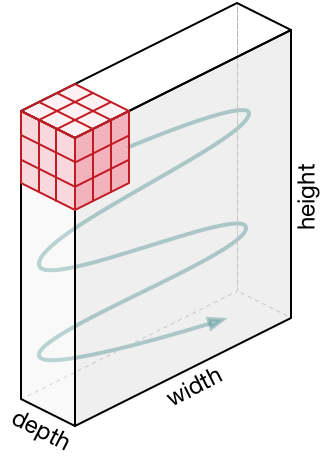

The filter moves to the right with a certain Stride Value till it parses the complete width. Moving on, it hops down to the beginning (left) of the image with the same Stride Value and repeats the process until the entire image is traversed.

### Pooling Layer
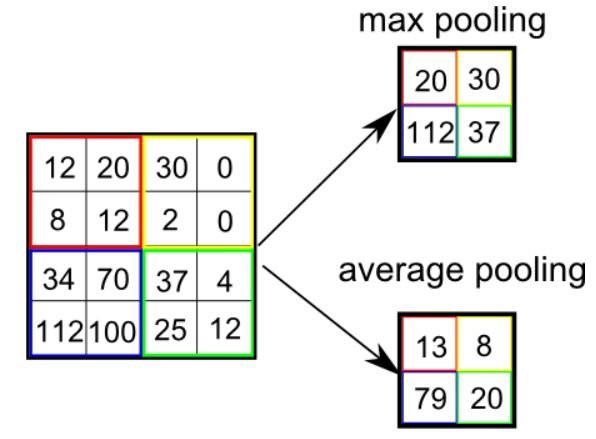

Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature. This is to **decrease the computational power required to process the data** through dimensionality reduction. Furthermore, it is useful for **extracting dominant features** which are rotational and positional invariant, thus maintaining the process of effectively training of the model.

There are two types of Pooling: **Max Pooling** and **Average Pooling**. Max Pooling returns the maximum value from the portion of the image covered by the Kernel. On the other hand, Average Pooling returns the average of all the values from the portion of the image covered by the Kernel.

Max Pooling also performs as a Noise Suppressant. It discards the noisy activations altogether and also performs de-noising along with dimensionality reduction. On the other hand, Average Pooling simply performs dimensionality reduction as a noise suppressing mechanism. Hence, we can say that **Max Pooling performs a lot better than Average Pooling**.

The Convolutional Layer and the Pooling Layer, together form the i-th layer of a Convolutional Neural Network. Depending on the complexities in the images, the number of such layers may be increased for capturing low-levels details even further, but at the cost of more computational power.

After going through the above process, we have successfully enabled the model to understand the features. Moving on, we are going to flatten the final output and feed it to a regular Neural Network for classification purposes.
### Classification — Fully Connected Layer 
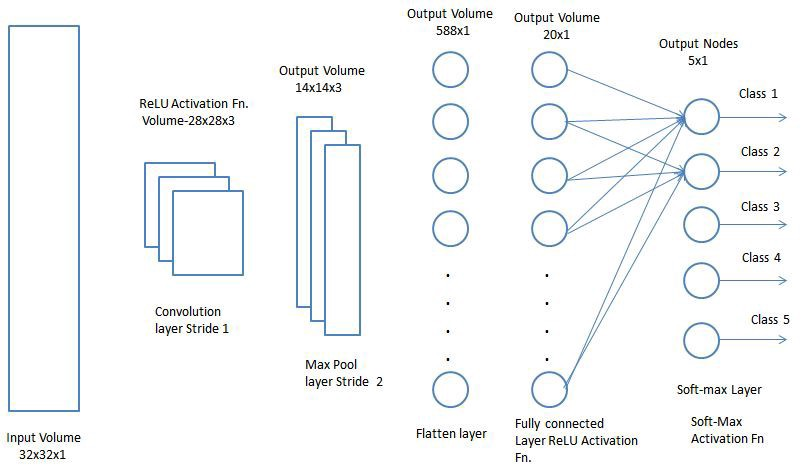

Adding a Fully-Connected layer is a cheap way of learning non-linear combinations of the high-level features as represented by the output of the convolutional layer. The Fully-Connected layer is learning a possibly non-linear function in that space.

Now that we have converted our input image into a suitable form for our Multi-Level Perceptron, we shall flatten the image into a column vector. The flattened output is fed to a feed-forward neural network and backpropagation applied to every iteration of training. Over a series of epochs, the model is able to distinguish between dominating and certain low-level features in images and classify them using the **Softmax Classification** technique.

## You can follow the steps below to build a simple CNN network and then perform the task of handwritten digit recognition

## 1. Import Libraries

To get started, we’ll need to import some libraries from PyTorch. In addition, we will also use matplotlib.pyplot to see our image data and test data.

In [3]:
import torch, torchvision
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'torchvision'

We also need to import the copy library in order to copy our model later on.

In [1]:
import copy

### Set the batch size to 64
Batch Size : the number of data samples crawled in one training session.
Batch size affects the training speed and model optimization it also affects the number of times the model is trained per epoch.
You can change the batch size to compare the training results。

In [ ]:
numb_batch = 64

## 2. Getting Data

We need to transform the image into a tensor that can be used, so we do torchvision.transforms.ToTensor().

We get the training data from the Mnist library and set download to True. Then we need to transfrom the images. The same can be done for the validation data except that that train is False.

We also need the dataloaders for each dataset and set the batch size to the wanted number, 64.

In [ ]:
T = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
train_data = torchvision.datasets.MNIST('mnist_data', train=True, download=True, transform=T)
val_data = torchvision.datasets.MNIST('mnist_data', train=False, download=True, transform=T)

train_dl = torch.utils.data.DataLoader(train_data, batch_size = numb_batch)
val_dl = torch.utils.data.DataLoader(val_data, batch_size = numb_batch)

## 3. Create Model

For the Mnist dataset, we will be using the LeNet-5 architecture as shown below:
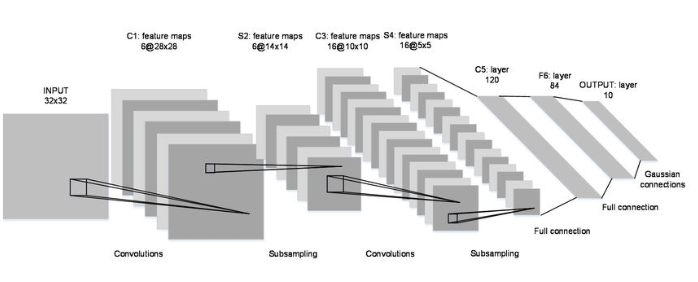

You can click [here](http://yann.lecun.com/exdb/lenet/index.html) to view the the official website of LeNet-5.
This is a classical structure of CNN, mainly for handwriting font recognition, and is a network that you need to learn to be familiar with when you are just starting out.

As you can see, it includes 2 convolutional layers, 2 pooling layers and 3 fully connected layers.

## Now, we will give you a base model, but this model is not operational, this is a challenge for you, please follow the given model schematic and sample code to complete the remaining convolutional, pooling and fully connected layers.

In [ ]:
def create_lenet():
    model = nn.Sequential(
        nn.Conv2d(1, 6, 5, padding=2),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Flatten(),
        nn.Linear(400, 10),
    )
    return model

## 4. Validating the Model
This validation will use the validation set of handwritten digits and compute how many images are predicted right out of the total number of images. This is just a simple loop through every image in the validation dataloader.

In [ ]:
def validate(model, data):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x,1)
        pred = pred.data.cpu()
        total += x.size(0)
        correct += torch.sum(pred == labels)
    return correct*100./total

## 5. Training Function
For training, we will set the default value to 3 epochs, the learning rate to 0.001, and the device to the cpu of the machine. These can be changed by using parameters when calling the train function.

We will use Cross Entropy Loss as our loss function of choice and the Adam optimizer.

An array of accuracies of the validation set is also being kept to plot the graph after the training process is finished for us to see how the model did on the validation.

We only want the best model, so we have to keep a max_accuracy variable and keep updating it if a new accuracy is higher than maximum. Then we just copy the best model into best_model and then return best_model at the end of the function.

In [ ]:
def train(numb_epoch=3, lr=1e-3, device="cpu"):
    accuracies = []
    cnn = create_lenet().to(device)
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr=lr)
    max_accuracy = 0
    for epoch in range(numb_epoch):
        for i, (images, labels) in enumerate(train_dl):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()
        accuracy = float(validate(cnn, val_dl))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy
            print("Saving Best Model with Accuracy: ", accuracy)
        print('Epoch:', epoch+1, "Accuracy :", accuracy, '%')
    plt.plot(accuracies)
    return best_model

## 6. GPU Availability
Now we check if a GPU is available. If so, then we can use it. If not, then we must resort to using the CPU.

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Using Cuda Now")
else:
    device = torch.device("cpu")
    print("No Cuda Available")

## 7. Training the Model
Now we will call the training function to actually train the model. Since the function will return the best model, we store it in the name *lenet*. You can try different epoch values and see what works best. If you do not have a GPU available, you can leave out the device=device because by default the function will use the CPU.

In [ ]:
lenet = train(device=device)

## 8. Saving the model
We can save the model using torch.save() and give a path and name for the model.

In [ ]:
torch.save(lenet.state_dict(), "lenet.pth")

## 9. Load the saved model
If you saved the model, and don’t want to train again, you can just load the model from the path.

In [ ]:
lenet = create_lenet().to(device)
lenet.load_state_dict(torch.load("lenet.pth"))
lenet.eval()

## 10. Review the confusion matrix
You can use the confusion matrix feature from sklearn，and show this confusion matrix through a pandas dataframe.
Hopefully, since our model was somewhere in the neighborhood of 99% accurate with the validation dataset, there should be little confusion between digits.

In [ ]:
def predict_dl(model, data):
    y_pred = []
    y_true = []
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x, 1)
        pred = pred.data.cpu()
        y_pred.extend(list(pred.numpy()))
        y_true.extend(list(labels.numpy()))
    return np.array(y_pred), np.array(y_true)

In [ ]:
y_pred, y_true = predict_dl(lenet, val_dl)

In [ ]:
pd.DataFrame(confusion_matrix(y_true, y_pred, labels=np.arange(0,10)))

## 11. Get prediction for any given image
Now that we are confident that our model is pretty good at classifying digits, we can get any image with a single digit in it and see what the model predicts! You can change the path of the image in your own code.

In [ ]:
def inference(x, model, device):
    with torch.no_grad():
        pred = model(torch.unsqueeze(T(x), axis=0).float().to(device))
        return F.softmax(pred, dim=-1).cpu().numpy()

In [ ]:
img = Image.open(r"D:\AI\CNN\1.jpg").convert(mode="L")
img = img.resize((28, 28))
x = (255 - np.expand_dims(np.array(img), -1))/255.
plt.imshow(x.squeeze(-1), cmap="gray")

In [ ]:
pred = inference(x, lenet, device=device)
pred_idx = np.argmax(pred)
print(f"Predicted: {pred_idx}, Prob: {pred[0][pred_idx]*100} %")

# Challenge
## 1.Change parameters such as batch size, number of epoch, learning rate, and try to find a model with the highest recognition rate.
## 2.Please use the series of images provided and input them into the model and think about why the predictions are different.